#Ejercicio sobre RNC
## Por: José Guarnizo


## Tarea


El conjunto de datos de moda MNIST es otro conjunto popular para la evaluación de modelos de visión computarizada. Consiste de 60,000 imágenes de entrenamiento, cada una es una imagen en escala de grises de 28x28, proveniente de 1 de 10 clases:

* 0 Polera/top
* 1 Pantalón
* 2 Suéter
* 3 Vestido
* 4 Abrigo
* 5 Sandalia
* 6 Camisa
* 7 Zapatilla
* 8 Bolso
* 9 Botín

Tu tarea es usar una RNC para clasificar las imágenes como uno de los 10 artículos de vestimenta. Puedes descargar los datos desde Kaggle. Trata de construir el mejor modelo posible (que tenga la mayor precisión en los datos de prueba).

## Librerías

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_train = '/content/drive/My Drive/Coding_Dojo/Week11/fashion-mnist_train.csv'
file_test = '/content/drive/My Drive/Coding_Dojo/Week11/fashion-mnist_test.csv'
df1 = pd.read_csv(file_train)
df2 = pd.read_csv(file_test)

## Código RNC

In [8]:
#Definición de matrices de caracteristicas y vector objetivo (entrenamiento y prueba)
X_train = df1.drop(columns="label")
y_train = df1.label
X_test = df2.drop(columns="label")
y_test = df2.label

In [9]:
# Escalar datos entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255
# Transformación de numericas a dummies
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [32]:
# Reducción de dimensionalidad para variabilidad 0.98
pca = PCA(0.98)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(60000, 349)

In [33]:
#Definición de número de entradas para red neuronal
input_shape = X_train_pca.shape[1]
input_shape

349

In [62]:
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(350, input_dim = input_shape, activation = 'relu')) 
model.add(Dropout(.5))
model.add(Dense(175, activation = 'relu')) 
model.add(Dropout(.2))
model.add(Dense(90, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
early_stopping = EarlyStopping(patience = 5)
# Ajustar nuestro modelo
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5691 - acc: 0.8024 - val_loss: 0.3645 - val_acc: 0.8722
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4101 - acc: 0.8565 - val_loss: 0.3334 - val_acc: 0.8807
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3655 - acc: 0.8724 - val_loss: 0.3205 - val_acc: 0.8845
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3382 - acc: 0.8791 - val_loss: 0.3147 - val_acc: 0.8849
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3174 - acc: 0.8880 - val_loss: 0.3044 - val_acc: 0.8892
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3019 - acc: 0.8933 - val_loss: 0.2951 - val_acc: 0.8947
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2884 - acc: 0.8971 - val_loss: 0.3047 - val_acc: 0.8953
Epoch 8/20
1875/1875 [==============================] -

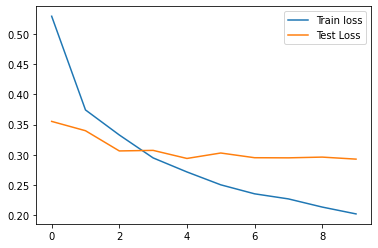

In [48]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

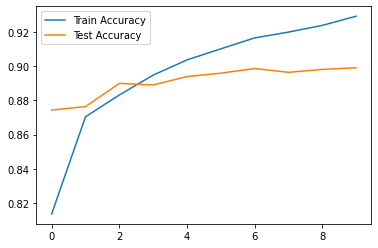

In [49]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();